In [2]:
import sys
sys.path.append( '/Users/bpb/Data/programming/MetaboliteAtlas/metatlas2p0/metatlas/metatlas' )
import h5_query as h5q
import mzml_loader as mzml_loader
import numpy as np
import tables
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

In [3]:
mypath = '/Users/bpb/Downloads/20150326_BN6_BN7/'
# mypath = '/Users/bpb/Downloads/'

In [4]:
# import os
# for file in os.listdir(mypath):
#     if file.endswith(".mzML"):
#         filename = '%s%s' % (mypath,file)
#         mzml_loader.mzml_to_hdf(filename)
#         print filename

In [95]:
# myfile = '20141211_caj211_Ecoli_unlabelled_glucose_POS.h5'
# myfile = '2015326_pHILIC_ACN_POS_MSMS_BN7_1062_SAR11_media_WithPolyamines_PPLex_95_Run36.h5'
# myfile = '2015326_pHILIC_ACN_POS_MSMS_BN6_1062_SAR11_media_NoOsmolytes_PPLex_26_Run32.h5'
# myfile = '2015326_pHILIC_ACN_POS_MSMS_BN6_1062_SAR11_media_WithOsmolytes_PPLex_43_Run21.h5'
myfile = '2015326_pHILIC_ACN_POS_MSMS_BN6_7211_SAR11_media_WithOsmolytes_PPLex_53_Run22.h5'
# myfile = '2015326_pHILIC_ACN_NEG_MSMS_BN6_1062_SAR11_media_WithOsmolytes_PPLex_42_Run15.h5'
# myfile = '2015326_pHILIC_ACN_NEG_MSMS_BN6_7211_SAR11_media_WithOsmolytes_PPLex_53_Run22.h5'
filename = '%s%s' % (mypath,myfile)
fid = tables.open_file(filename)

In [134]:
# get total spectrum
min_rt = 12
max_rt = 14
ms_level = 2
polarity = 1
mz,intensity = h5q.get_spectrogram(fid, min_rt, max_rt, ms_level, polarity,bins=1e6)

Querying: (ms_level == 2) & (polarity == 1) & (rt >= 12) & (rt <= 14)


In [140]:
idx = np.argsort(intensity)
for i in idx:
    if intensity[i] > 1:
        if mz[i] < 140:
            print mz[i]

138.030492755
102.009307782
126.022015504
103.006593202
134.996876493
116.986284006
121.016477892
98.97569152
120.019900268
132.905337516
124.024613476
137.029668351
101.009191175
119.019075864


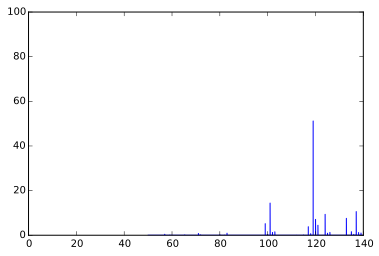

In [139]:
plt.plot(mz,intensity)
plt.xlim(0,140)
plt.show()
# print len(rt)

Querying: (ms_level == 1) & (polarity == 1)


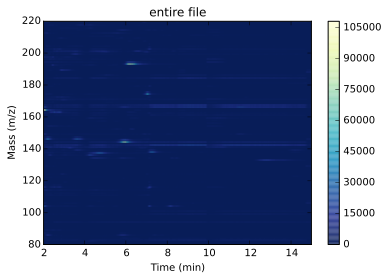

In [107]:
# get coarse 2d hist
mzEdges = np.linspace(80, 220,500)
rtEdges = np.linspace(2,15,500)
ms_level = 1
polarity = 1
hMap = h5q.get_HeatMapRTMZ(fid,mzEdges,rtEdges,ms_level,polarity)
h5q.plot_heatmap((hMap['arr']+1)**0.5,hMap['rt_bins'],hMap['mz_bins'],title='entire file')
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)

<function matplotlib.pyplot.show>

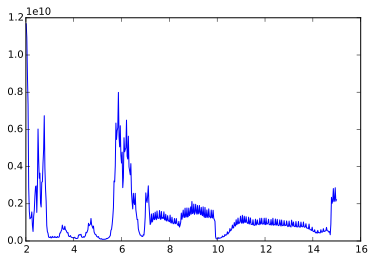

In [106]:
plt.plot(hMap['rt_bins'],np.max(hMap['arr'],axis=0))
plt.show


In [146]:
# mz_theor = 89.0477 - 1.007276 # sarcosine minus proton
# mz_theor = 89.0477 + 59.013851 # sarcosine plus acetate anion
# mz_theor = 89.0477 + 1.007276 # sarcosine plus proton
# mz_theor = 105.0426 + 1.007276 # serine plus proton
# mz_theor = 105.0426 +  59.013851# serine plus acetate anion
# mz_theor = 149.051024 + 1.007276
# mz_theor = 202.033819322 - 1.007276 #5-hydroxy-2-oxo-4-ureido-2,5-dihydro-1H-imidazole-5-carboxylate
# mz_theor = 132.90533751
mz_theor = 132.904971 #bromomethane plus potassium
print mz_theor

132.904971


In [147]:
polarity = 1
rt,intensity = h5q.get_XIC(fid, mz_theor - mz_theor*5/1e6, mz_theor + mz_theor*5/1e6, 1, polarity)

Querying: (ms_level == 1) & (polarity == 1) & (mz >= 132.904306475) & (mz <= 132.905635525)


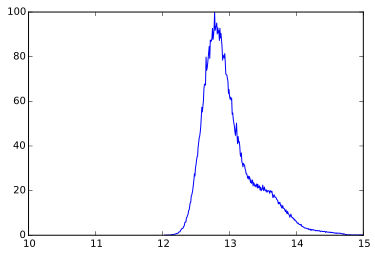

717


In [148]:
plt.plot(rt,intensity)
plt.xlim(10,15)
plt.show()
print len(rt)

Querying: (ms_level == 2) & (polarity == 1) & (rt >= 12) & (rt <= 14) & (mz >= 0) & (mz <= 142.90533751) & (precursor_MZ >= 132.892046976) & (precursor_MZ <= 132.918628044)


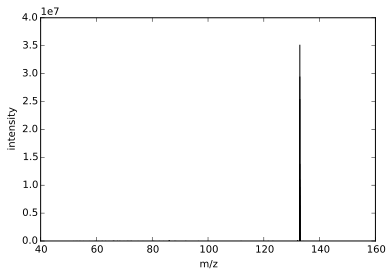

[  52.06467438   53.12747574   87.10040283   72.08161163  134.11749268
  121.01668549   87.02729034  114.96141052  101.00928497  137.02902222
  114.09178162   51.41088104  114.94343567   67.47671509   60.33616257
   92.34328461   71.03007507   64.4953537    55.33673096   88.02223206
   59.60611725   84.0668869    80.89266205   60.05659103  134.11808777
   88.02243805   53.17705917   71.02993011   52.71913147   54.20748901
  100.02505493   82.53791046   51.85208893   69.86819458   59.7162323
   71.27820587   71.23334503  142.03546143   76.70758057   74.94435883
   82.53751373   59.32613754   53.92462921   60.77998734   71.71233368
   96.5776062   119.97901917   57.55420685   60.59415817  119.01934814
   96.5239563   132.10198975  132.10244751  132.10220337   65.96556854
  111.87220764   63.30717087   88.42658997   86.09699249  121.58506012
  132.10224915  123.24208069   68.39012146   86.09719849   86.09709167
   92.03212738   62.08637619  132.10217285   80.44406891   67.5621109
   86.09

In [145]:
ms_level=2
rt_min = 12
rt_max = 14
data = h5q.get_data(fid, ms_level, polarity,
                    min_mz=0,
                    max_mz=mz_theor+10,
                    min_rt=rt_min,
                    max_rt=rt_max,
                    min_precursor_MZ=mz_theor -  mz_theor*100/1e6,
                    max_precursor_MZ=mz_theor +  mz_theor*100/1e6)
#                     min_precursor_intensity=0,
#                     max_precursor_intensity=0,
#                     min_collision_energy=0,
#                     max_collision_energy=0)
plt.vlines(data['mz'],0,data['i'],color='k',linestyles='solid')
plt.xlabel('m/z')
plt.ylabel('intensity')
# plt.plot(data['mz'],data['i'])
plt.show()
idx = np.argsort(data['i'])
print data['mz'][idx]

Querying: (ms_level == 1) & (polarity == 1)


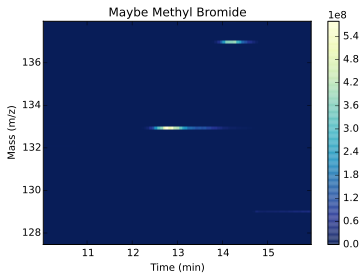

In [161]:
mzEdges = np.linspace(mz_theor - 5.5, mz_theor + 5.1,100)
rtEdges = np.linspace(10,16,100)
ms_level = 1
polarity = 1
hMap = h5q.get_HeatMapRTMZ(fid,mzEdges,rtEdges,ms_level,polarity)
h5q.plot_heatmap(hMap['arr'],hMap['rt_bins'],hMap['mz_bins'],title='Maybe Methyl Bromide')
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)


In [150]:
mz_centroid = np.sum( np.multiply( np.sum(hMap['arr'],axis=1), hMap['mz_bins']) ) / np.sum( hMap['arr'] )
print "The measured centroid from this 2d hist is %5.5f" % mz_centroid

The measured centroid from this 2d hist is 132.90497


Querying: (ms_level == 1) & (polarity == 1)


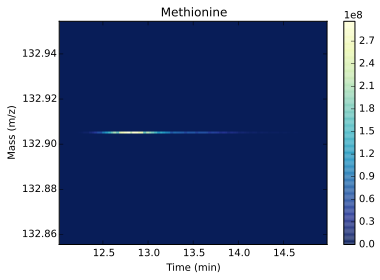

In [151]:
mzEdges = np.linspace(mz_theor - 0.05, mz_theor + 0.05, 100)
rtEdges = np.linspace(12,15,100)
ms_level = 1
polarity = 1
hMap = h5q.get_HeatMapRTMZ(fid,mzEdges,rtEdges,ms_level,polarity)
h5q.plot_heatmap(hMap['arr'],hMap['rt_bins'],hMap['mz_bins'],title='Methionine')
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)


In [152]:
mz_centroid = np.sum( np.multiply( np.sum(hMap['arr'],axis=1), hMap['mz_bins']) ) / np.sum( hMap['arr'] )
print "The measured centroid from this 2d hist is %5.5f" % mz_centroid

The measured centroid from this 2d hist is 132.90497


Querying: (ms_level == 1) & (polarity == 1)


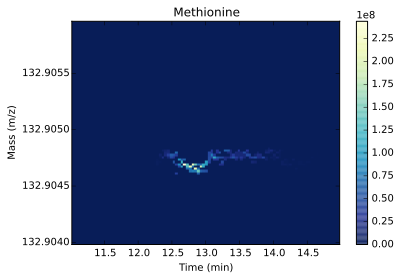

In [156]:
mzEdges = np.linspace(mz_theor - 0.001, mz_theor + 0.001,100)
rtEdges = np.linspace(11,15,100)
ms_level = 1
polarity = 1
hMap = h5q.get_HeatMapRTMZ(fid,mzEdges,rtEdges,ms_level,polarity)
h5q.plot_heatmap(hMap['arr'],hMap['rt_bins'],hMap['mz_bins'],title='Methionine')
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)

In [154]:
mz_centroid = np.sum( np.multiply( np.sum(hMap['arr'],axis=1), hMap['mz_bins']) ) / np.sum( hMap['arr'] )
print "The measured centroid from this 2d hist is %5.5f" % mz_centroid

The measured centroid from this 2d hist is 132.90471


In [17]:
print hMap['arr'].shape
print hMap['mz_bins'].shape
print hMap['rt_bins'].shape

(99, 99)
(99,)
(99,)
